<div style="text-align: center;">
    <img src="makdown_images/packages.jpg" style="width:600px;height:350px;">
</div>

## 📚 1 - Importing Libraries
First, let's run the cell below to import all the packages that you will need during this project.

In [171]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.activations import linear, relu, sigmoid, softmax
from matplotlib import pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from PIL import Image

<div style="text-align: center;">
    <img src="makdown_images/LoadData.jpg" style="width:600px;height:350px;">
</div>

## 📦 2 - Load and Process the Dataset
In this part, we load and process the dataset. We loop through each folder corresponding to different shapes, read images, resize them to 60x60 pixels, and store them in a list. Each image is labeled with the index of the folder it belongs to.

In [172]:
folders, labels, images = ['triangle' , 'star', 'square', 'circle'], [], []
for folder in folders: #This loop iterates over each folder name in the folders list and prints the folder name.
    for path in os.listdir(os.getcwd() + '/shapes/' + folder):
        """
        os.getcwd(): Gets the current working directory.
        'shapes': A subdirectory in the current working directory.
        folder: The current folder being processed.
        os.path.join(...): Combines these parts into a single path string.
        """
        
        img_path = os.path.join(os.getcwd(), 'shapes', folder, path)
        img = cv2.imread(img_path, 0) #cv2.imread(img_path, 0): Reads the image at the specified path in grayscale mode (0).
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue    
        images.append(cv2.resize(img, (60, 60))) 
        """
        cv2.resize(img, (60, 60)): Resizes the image to 60x60 pixels.
        images.append(...): Appends the resized image to the images list.
        """
        
        labels.append(folders.index(folder))
        """
        folders.index(folder): Gets the index of the current folder in the folders list (e.g., 0 for 'triangle', 1 for 'star', etc.).
        """
        

In [174]:
images = np.asarray(images)
labels = np.asarray(labels)
print ("shape of images and labels: ")
print(images.shape)
print(labels.shape)

shape of images and labels: 
(14970, 60, 60)
(14970,)


<div style="text-align: center;">
    <img src="makdown_images/flatten.jpg" style="width:600px;height:350px;">
</div>

### 📝 2-1 Flatten Data
After loading the images, we convert the list of images and labels to NumPy arrays. Then, we reshape the images into a 2D array where each image is a flattened vector.

In [175]:
num_images = images.shape[0]
images_flattened = images.reshape(num_images, -1)

<div style="text-align: center;">
    <img src="makdown_images/TrainTest.jpg" style="width:600px;height:350px;">
</div>

### ✂️ 2-2 Split to Train and Test
Here, we split the dataset into training and testing sets. We shuffle the indices, then split the data, with 80% used for training and 20% for testing.

In [176]:
#Use Sklearn
# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Shuffle the data
indices = np.arange(images_flattened.shape[0])
np.random.shuffle(indices)
images_flattened = images_flattened[indices]
labels = labels[indices]

# Split the data
test_size = 0.2
split_index = int(images_flattened.shape[0] * (1 - test_size))
X_train, X_test = images_flattened[:split_index], images_flattened[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

In [177]:
print(f"The shape of X_train is: {X_train.shape} , and y_train is: {y_train.shape}")
print(f"The shape of X_test is: {X_test.shape} , and y_test is: {y_test.shape}")


The shape of X_train is: (11976, 3600) , and y_train is: (11976,)
The shape of X_test is: (2994, 3600) , and y_test is: (2994,)


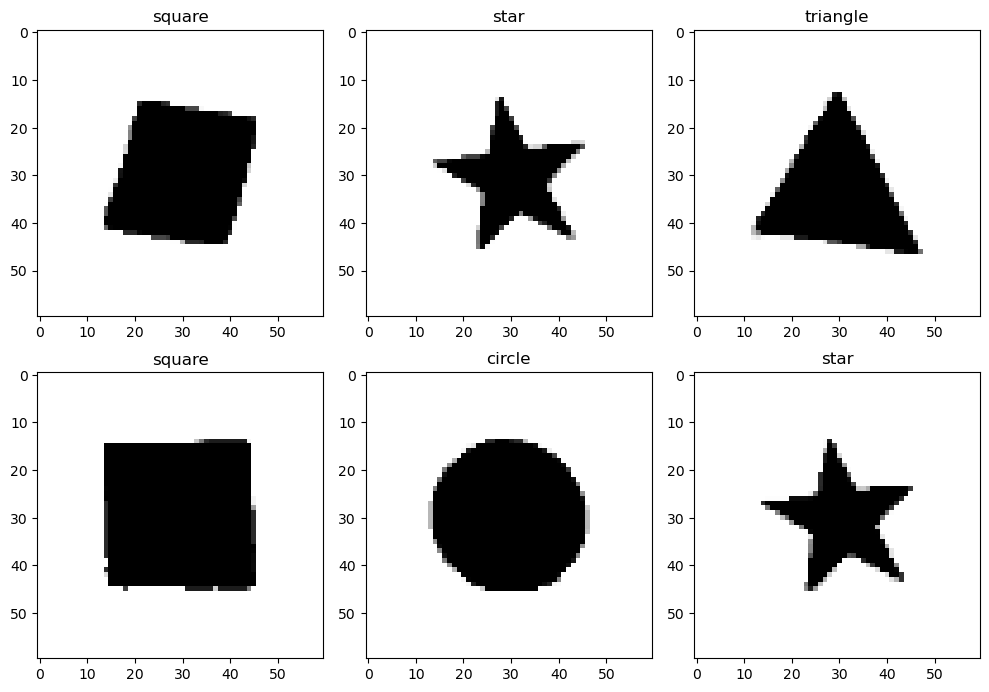

In [179]:
#using OpenCv

# cv2.imshow("Sample Image", images[1])
# cv2.waitKey(0)
# cv2.destroyAllWindows()


#using Matplotlib
# Plot 6 examples from the training set
num_examples = 6
fig, axes = plt.subplots(2, 3, figsize=(10, 7))  # 2 rows, 3 columns
axes = axes.flatten()

for i in range(num_examples):
    axes[i].imshow(X_train[i].reshape(60, 60), cmap='gray')
    axes[i].set_title(folders[y_train[i]])


plt.tight_layout()
plt.show()

In [180]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<div style="text-align: center;">
    <img src="makdown_images/model.jpg" style="width:600px;height:350px;">
</div>

## 🤖 3 - Model (TensorFlow)
We define a neural network model using TensorFlow's Keras API. The model consists of multiple dense layers with ReLU activations and a softmax output layer. We compile the model with a sparse categorical cross-entropy loss function and the Adam optimizer. Early stopping is used to prevent overfitting.

In [183]:
model = Sequential(
    [
        tf.keras.Input((3600, )),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(4 , activation='linear')],
        name = "Shape_Recognition"
)

In [184]:
model.summary() 

Model: "Shape_Recognition"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               921856    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 4)                 260       
Total params: 963,268
Trainable params: 963,268
Non-trainable params: 0
_________________________________________________________________


In [185]:
[layer1, layer2, layer3, layer4] = model.layers

# Weights shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
W4, b4 = layer4.get_weights()

print(f"W1 Shape = {W1.shape} , B1 Shape = {b1.shape}")
print(f"W2 Shape = {W2.shape} , B2 Shape = {b2.shape}")
print(f"W3 Shape = {W3.shape} , B3 Shape = {b3.shape}")
print(f"W4 Shape = {W4.shape} , B4 Shape = {b4.shape}")

W1 Shape = (3600, 256) , B1 Shape = (256,)
W2 Shape = (256, 128) , B2 Shape = (128,)
W3 Shape = (128, 64) , B3 Shape = (64,)
W4 Shape = (64, 4) , B4 Shape = (4,)


In [187]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), #This loss function allows you to use integer targets directly without the need for one-hot encoding. It internally handles the conversion and comparison between the predicted logits and the integer labels.
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy']
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size = 32,
                   validation_data=(X_test, y_test),
                   epochs = 14,
                   callbacks = [early_stopping])
                   

Epoch 1/14
375/375 [==============================] - 2s 4ms/step - loss: 0.0201 - accuracy: 0.9958 - val_loss: 5.2756e-04 - val_accuracy: 0.9997
Epoch 2/14
375/375 [==============================] - 2s 4ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/14
375/375 [==============================] - 1s 4ms/step - loss: 3.7890e-04 - accuracy: 1.0000 - val_loss: 6.3431e-04 - val_accuracy: 0.9997
Epoch 4/14
375/375 [==============================] - 2s 4ms/step - loss: 5.3230e-05 - accuracy: 1.0000 - val_loss: 1.0599e-04 - val_accuracy: 1.0000
Epoch 5/14
375/375 [==============================] - 2s 4ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0023 - val_accuracy: 0.9990
Epoch 6/14
375/375 [==============================] - 2s 4ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 7/14
375/375 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0083 - val_acc

<div style="text-align: center;">
    <img src="makdown_images/training.jpg" style="width:600px;height:350px;">
</div>

## 📈 4 - Plot Training & Validation Accuracy and Loss
This part plots the training and validation accuracy and loss values over the epochs. The plots help visualize how well the model is learning and if it is overfitting or underfitting.

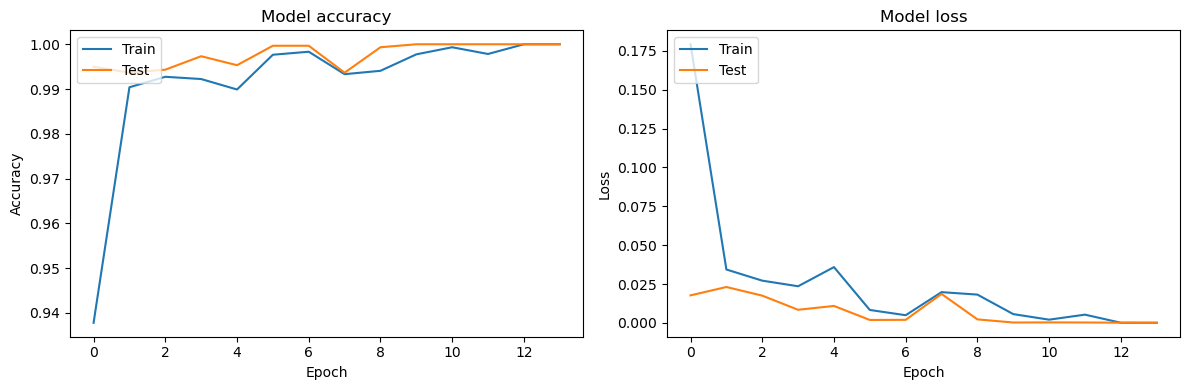

In [148]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

<div style="text-align: center;">
    <img src="makdown_images/prediction.jpg" style="width:600px;height:350px;">
</div>

## 🔍 5 - Prediction
Finally, we load an image from the test set, preprocess it, and make a prediction using the trained model. The predicted class is printed along with the largest prediction index.

[[ 7.926403  -6.416448  -1.4239012 -9.662263 ]]
 Largest Prediction index: triangle



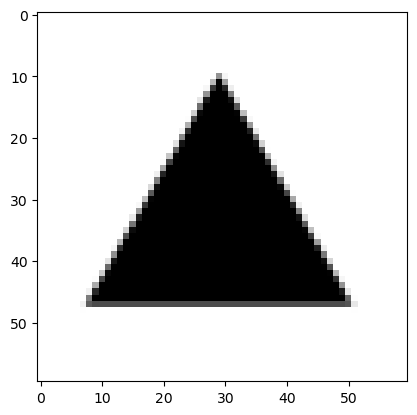

In [210]:
my_image = "tr1.png"

fname = "test_images/" + my_image
image = np.array(Image.open(fname).resize((60, 60)).convert('L'))
plt.imshow(image, cmap = 'gray')
image = image / 255
image = image.reshape(1, 60 * 60 )
prediction = model.predict(image)
print(prediction)
print(f" Largest Prediction index: {folders[np.argmax(prediction)]}\n")